Loading news data...
Loading stock data...
Aggregating data by date...
 Data preparation completed!
Analysis period: 2009-04-27 00:00:00 to 2020-06-11 00:00:00
Total days with both news and stock data: 2757

=== CORRELATION ANALYSIS ===
Pearson Correlation: 0.0439
P-value: 0.0211
 Correlation is statistically significant (p < 0.05)
Correlation strength: very weak

=== LAGGED CORRELATIONS ===
Lag 1 day(s): 0.0013 (p-value: 0.9477) _X_
Lag 2 day(s): -0.0070 (p-value: 0.7126) _X_
Lag 3 day(s): 0.0131 (p-value: 0.4923) _X_
Lag 4 day(s): 0.0166 (p-value: 0.3849) _X_
Lag 5 day(s): -0.0018 (p-value: 0.9254) _X_


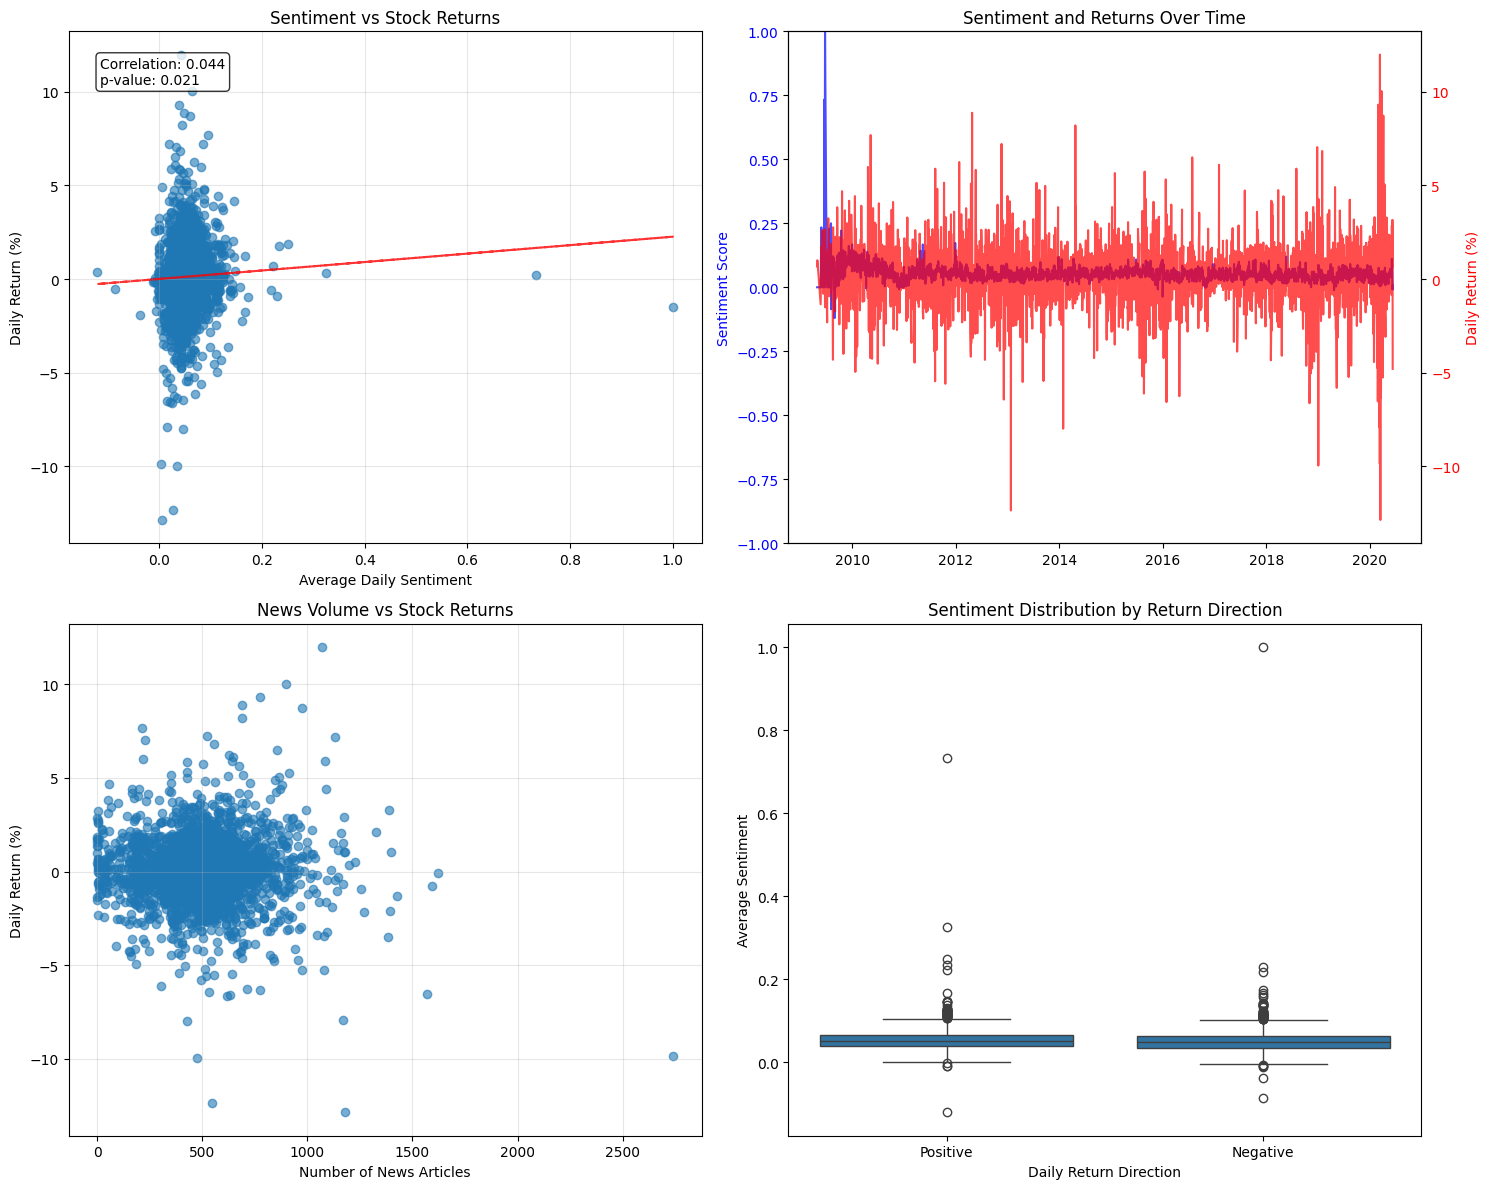


=== ADVANCED ANALYSIS ===
Correlation on high-sentiment days: -0.0023 (p-value: 0.9321)


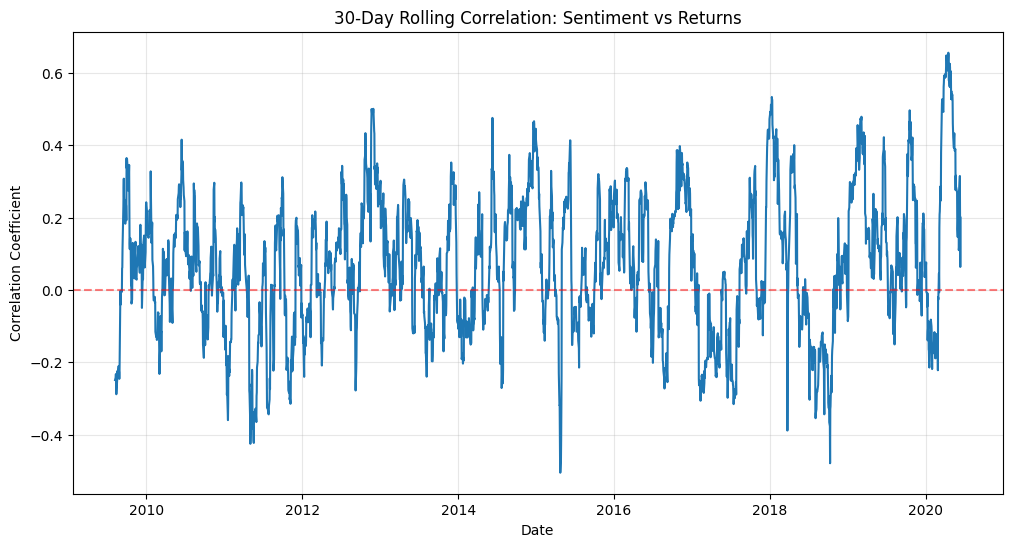

Average rolling correlation: 0.0697

=== SENTIMENT CATEGORY ANALYSIS ===
Average Returns by Sentiment Category:
                        mean       std  count
sentiment_category                           
Negative            0.354054       NaN      1
Neutral             0.120551  1.735947   2642
Positive            0.164403  1.687157    114


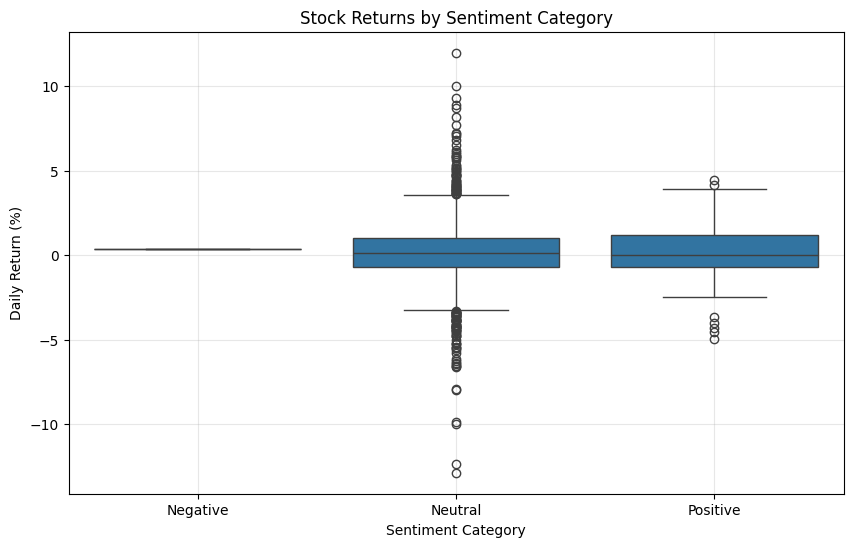


=== SUMMARY STATISTICS ===
       avg_sentiment  daily_return   news_count
count    2757.000000   2757.000000  2757.000000
mean        0.052939      0.122449   500.428364
std         0.033751      1.733371   210.730751
min        -0.120524    -12.864700     1.000000
25%         0.037289     -0.692272   388.000000
50%         0.049926      0.100857   491.000000
75%         0.063825      1.031713   610.000000
max         1.000000     11.980808  2739.000000


In [1]:
import sys
import os

# Add the modules directory to Python path
module_path = os.path.abspath(os.path.join('..', 'scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)

from correlation import CorrelationAnalysis


news_data_path = "../data/newsData/raw_analyst_ratings.csv"
stock_data_path = "../data/yfinance_data/Data/AAPL.csv"

analyzer = CorrelationAnalysis()

try:
        # Perform analysis
        merged_data, news_data, stock_data = analyzer.load_and_prepare_data(news_data_path, stock_data_path)
        
        if len(merged_data) > 0:
            # Run all analyses
            analyzer.calculate_correlations()
            analyzer.create_correlation_visualizations()
            analyzer.advanced_correlation_analysis()
            analyzer.sentiment_category_analysis()
            
            # Print summary statistics
            print(analyzer.get_summary_statistics())
        else:
            print(" No overlapping data found between news and stock datasets!")
        
except Exception as e:
        print(f" Error during analysis: {e}")
        import traceback
        print(traceback.format_exc())